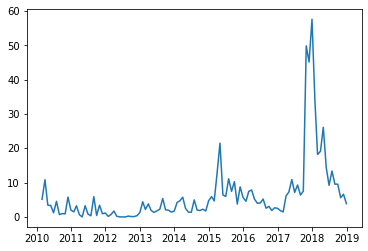

In [27]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('TIME_SERIES_INFO.csv',usecols=[0,5],engine='python',sep=';')
dataset['date_arb'] = pandas.to_datetime(dataset['date_arb'])
plt.plot(dataset.date_arb,dataset.euro_sortant*10000)
plt.show()

# Long Short-Term Memory Network

In [24]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [25]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [26]:
# load the dataset
dataframe = pandas.read_csv('TIME_SERIES_INFO.csv',usecols=[5],engine='python',sep=';')*10000
dataset = dataframe.values
dataset = dataset.astype('float32')

In [27]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [28]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

72 36


In [29]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [30]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [31]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [32]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.0048
Epoch 2/100
 - 0s - loss: 0.0038
Epoch 3/100
 - 0s - loss: 0.0038
Epoch 4/100
 - 0s - loss: 0.0037
Epoch 5/100
 - 0s - loss: 0.0037
Epoch 6/100
 - 0s - loss: 0.0036
Epoch 7/100
 - 0s - loss: 0.0036
Epoch 8/100
 - 0s - loss: 0.0035
Epoch 9/100
 - 0s - loss: 0.0035
Epoch 10/100
 - 0s - loss: 0.0034
Epoch 11/100
 - 0s - loss: 0.0034
Epoch 12/100
 - 0s - loss: 0.0034
Epoch 13/100
 - 0s - loss: 0.0033
Epoch 14/100
 - 0s - loss: 0.0033
Epoch 15/100
 - 0s - loss: 0.0033
Epoch 16/100
 - 0s - loss: 0.0033
Epoch 17/100
 - 0s - loss: 0.0032
Epoch 18/100
 - 0s - loss: 0.0032
Epoch 19/100
 - 0s - loss: 0.0031
Epoch 20/100
 - 0s - loss: 0.0031
Epoch 21/100
 - 0s - loss: 0.0031
Epoch 22/100
 - 0s - loss: 0.0031
Epoch 23/100
 - 0s - loss: 0.0031
Epoch 24/100
 - 0s - loss: 0.0030
Epoch 25/100
 - 0s - loss: 0.0030
Epoch 26/100
 - 0s - loss: 0.0030
Epoch 27/100
 - 0s - loss: 0.0030
Epoch 28/100
 - 0s - loss: 0.0030
Epoch 29/100
 - 0s - loss: 0.0030
Epoch 30/100
 - 0s - lo

In [33]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.07 RMSE
Test Score: 10.67 RMSE


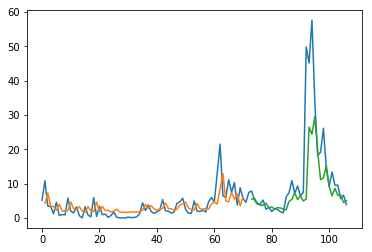

In [34]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for Regression Using the Window Method

Epoch 1/100
 - 3s - loss: 0.0054
Epoch 2/100
 - 0s - loss: 0.0042
Epoch 3/100
 - 0s - loss: 0.0041
Epoch 4/100
 - 0s - loss: 0.0040
Epoch 5/100
 - 0s - loss: 0.0039
Epoch 6/100
 - 0s - loss: 0.0039
Epoch 7/100
 - 0s - loss: 0.0038
Epoch 8/100
 - 0s - loss: 0.0037
Epoch 9/100
 - 0s - loss: 0.0037
Epoch 10/100
 - 0s - loss: 0.0036
Epoch 11/100
 - 0s - loss: 0.0035
Epoch 12/100
 - 0s - loss: 0.0035
Epoch 13/100
 - 0s - loss: 0.0034
Epoch 14/100
 - 0s - loss: 0.0034
Epoch 15/100
 - 0s - loss: 0.0033
Epoch 16/100
 - 0s - loss: 0.0032
Epoch 17/100
 - 0s - loss: 0.0031
Epoch 18/100
 - 0s - loss: 0.0031
Epoch 19/100
 - 0s - loss: 0.0030
Epoch 20/100
 - 0s - loss: 0.0029
Epoch 21/100
 - 0s - loss: 0.0029
Epoch 22/100
 - 0s - loss: 0.0029
Epoch 23/100
 - 0s - loss: 0.0028
Epoch 24/100
 - 0s - loss: 0.0028
Epoch 25/100
 - 0s - loss: 0.0028
Epoch 26/100
 - 0s - loss: 0.0028
Epoch 27/100
 - 0s - loss: 0.0027
Epoch 28/100
 - 0s - loss: 0.0027
Epoch 29/100
 - 0s - loss: 0.0027
Epoch 30/100
 - 0s - lo

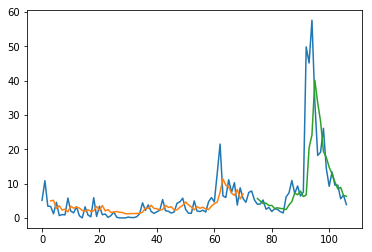

In [35]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('TIME_SERIES_INFO.csv',usecols=[5],engine='python',sep=';')*10000
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for Regression with Time Steps

Epoch 1/100
 - 4s - loss: 0.0043
Epoch 2/100
 - 0s - loss: 0.0035
Epoch 3/100
 - 0s - loss: 0.0034
Epoch 4/100
 - 0s - loss: 0.0033
Epoch 5/100
 - 0s - loss: 0.0032
Epoch 6/100
 - 0s - loss: 0.0032
Epoch 7/100
 - 0s - loss: 0.0031
Epoch 8/100
 - 0s - loss: 0.0030
Epoch 9/100
 - 0s - loss: 0.0030
Epoch 10/100
 - 0s - loss: 0.0030
Epoch 11/100
 - 0s - loss: 0.0029
Epoch 12/100
 - 0s - loss: 0.0029
Epoch 13/100
 - 0s - loss: 0.0029
Epoch 14/100
 - 0s - loss: 0.0029
Epoch 15/100
 - 0s - loss: 0.0029
Epoch 16/100
 - 0s - loss: 0.0029
Epoch 17/100
 - 0s - loss: 0.0028
Epoch 18/100
 - 0s - loss: 0.0028
Epoch 19/100
 - 0s - loss: 0.0028
Epoch 20/100
 - 0s - loss: 0.0028
Epoch 21/100
 - 0s - loss: 0.0027
Epoch 22/100
 - 0s - loss: 0.0027
Epoch 23/100
 - 0s - loss: 0.0027
Epoch 24/100
 - 0s - loss: 0.0027
Epoch 25/100
 - 0s - loss: 0.0027
Epoch 26/100
 - 0s - loss: 0.0027
Epoch 27/100
 - 0s - loss: 0.0027
Epoch 28/100
 - 0s - loss: 0.0028
Epoch 29/100
 - 0s - loss: 0.0028
Epoch 30/100
 - 0s - lo

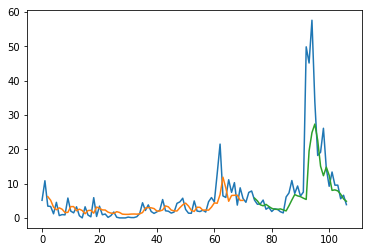

In [36]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('TIME_SERIES_INFO.csv',usecols=[5],engine='python',sep=';')*10000
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM with Memory Between Batches

Epoch 1/1
 - 3s - loss: 0.0028
Epoch 1/1
 - 0s - loss: 0.0034
Epoch 1/1
 - 0s - loss: 0.0032
Epoch 1/1
 - 0s - loss: 0.0031
Epoch 1/1
 - 0s - loss: 0.0030
Epoch 1/1
 - 0s - loss: 0.0030
Epoch 1/1
 - 0s - loss: 0.0029
Epoch 1/1
 - 0s - loss: 0.0029
Epoch 1/1
 - 0s - loss: 0.0029
Epoch 1/1
 - 0s - loss: 0.0028
Epoch 1/1
 - 0s - loss: 0.0028
Epoch 1/1
 - 0s - loss: 0.0028
Epoch 1/1
 - 0s - loss: 0.0028
Epoch 1/1
 - 0s - loss: 0.0028
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0026
Epoch 1/1
 - 0s - loss: 0.0026
Epoch 1/1
 - 0s - loss: 0.0026
Epoch 1/1
 - 0s - loss: 0.0026
Epoch 1/1
 - 0s - loss: 0.0026
Epoch 1/1
 - 0s - loss: 0.0026
Epoch 1/

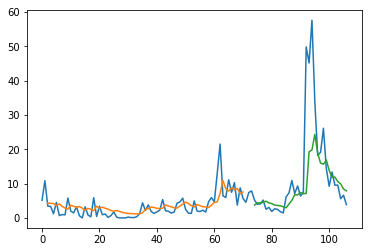

In [37]:
# LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('TIME_SERIES_INFO.csv',usecols=[5],engine='python',sep=';')*10000
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Stacked LSTMs with Memory Between Batches

Epoch 1/1
 - 4s - loss: 0.0034
Epoch 1/1
 - 0s - loss: 0.0032
Epoch 1/1
 - 0s - loss: 0.0030
Epoch 1/1
 - 0s - loss: 0.0028
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0025
Epoch 1/1
 - 0s - loss: 0.0023
Epoch 1/1
 - 0s - loss: 0.0021
Epoch 1/1
 - 0s - loss: 0.0020
Epoch 1/1
 - 0s - loss: 0.0018
Epoch 1/1
 - 0s - loss: 0.0017
Epoch 1/1
 - 0s - loss: 0.0015
Epoch 1/1
 - 0s - loss: 0.0014
Epoch 1/1
 - 0s - loss: 0.0012
Epoch 1/1
 - 0s - loss: 0.0011
Epoch 1/1
 - 0s - loss: 0.0010
Epoch 1/1
 - 0s - loss: 8.9924e-04
Epoch 1/1
 - 0s - loss: 7.9770e-04
Epoch 1/1
 - 0s - loss: 7.0333e-04
Epoch 1/1
 - 0s - loss: 6.1609e-04
Epoch 1/1
 - 0s - loss: 5.3586e-04
Epoch 1/1
 - 0s - loss: 4.6243e-04
Epoch 1/1
 - 0s - loss: 3.9564e-04
Epoch 1/1
 - 0s - loss: 3.3529e-04
Epoch 1/1
 - 0s - loss: 2.8117e-04
Epoch 1/1
 - 0s - loss: 2.3302e-04
Epoch 1/1
 - 0s - loss: 1.9053e-04
Epoch 1/1
 - 0s - loss: 1.5341e-04
Epoch 1/1
 - 0s - loss: 1.2135e-04
Epoch 1/1
 - 0s - loss: 9.3991e-05
Epoch 1/1
 - 0

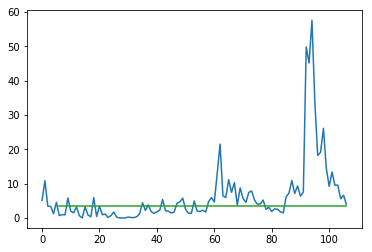

In [38]:
# Stacked LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('TIME_SERIES_INFO.csv',usecols=[5],engine='python',sep=';')*10000
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [17]:
# lstm autoencoder recreate sequence
from numpy import array
from pandas import read_csv
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

import keras
import pydot
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot

# load the dataset
dataframe = read_csv('TIME_SERIES_INFO.csv',usecols=[5],engine='python',sep=';')*10000
dataset = dataframe.values
dataset = dataset.astype('float32')


# reshape input into [samples, timesteps, features]
n_in = len(dataset)
dataset = dataset.reshape((1, n_in, 1))

type(dataset)

numpy.ndarray

In [ ]:

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(dataset, dataset, epochs=300, verbose=0)
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
# demonstrate recreation
yhat = model.predict(dataset, verbose=0)
print(yhat[0,:,0])